# TODO
-  make function that takes kernel keyword and works in both. Kernel agnostic import of libraries. maybe also suppresses print output. maybe even function that can find out which kernel on its own! 
- comparator that uses 
- go over text and improve
- let jeroen test read
- finsih examples
- add links and references
- post 
- create docker image 
- import csv using some get request from my somewhere (maybe github gist? )
- talk about no derivs work of r4ds. That I wasn't comfortable posting their examples.
- read csv use sematitic's csv/slurp-csv as that has less complexity. We only work with dataset in memory anyway .
- talk about adgoji in intro. We're clojure shop and have lately been looking how much of data science we can alsog migtrate to clojure. I've madee this to find the edges of the clojure ecosystem and whats still msising. I'm realeasing
it as a blogpost since There's been a call for examples and tutorials. hopeufully this can be usefull to others.
- thanks so much to hadley wickham that's been generous enough to allow to use code examples from r4ds in this blogpost. Disclaimer ...  give appropriate credit, provide a link to the license, indicate that changes were made and don't use it for commercial purposes.
- simon belak strikken om blog te proofreaden 
- change use of hc/select-cols to clojure.set/project to encourage use of excelent standard library
- react to simon belak's response on pull request and further work it out. Defer to his preference as he is the library maintainer. suggest use of project-by instead of select-cols-by 
- write about clojure.set/rename instead of derive-cols and selecting everything except old one. 
- add run!-pipe and partial-right to pull request 
- try to replace huri completely with clojure.set
- replace hc/where with clojure.set/select. figure out how to give multiple input predicates. Also check if you can't use for clojure.set/join for this?
- talk about how my code in r is littered with group-by and then ungroups. I often forget to ungroup. I don't like that. I prefer it if I have to be explicit that the operation I'm doing is meant to be applied to grouped structure
- huri you can pick and choose what you want I like that. It means also that I can prefer standard clojure liek clojure.set/project whenever possible and only fill in the gaps with huri. 
- figure out how to do options maps well. look at semantic-csv and other places
- talk about the elision and rebl that cgrands claims to have implemented in iclojure with the nb extension. 
- think a bit harder still about grouped filter and mutate. Can I really not do it without plumatic plumming? I'd prefer to use a simple clojure or huri function and if necessary compose it with a function (e.g. the funcs map-vals, since grouping vars are the keywords and the grouped data are the vals)  such that it can work on grouped df's. 



R list columns vs clojure nested maps 
- when I have a df with list column a. Now I do mutate(df, b = sum(a)). How does r know what to do? Do I want that ambiguity? If a is list column I want it to sum values of list which is a rowwise operation. However, if a would not be a list column I'd want it to list all values if column a and set each value in b to that value, (not rowwise operation). These two meanings are complected in R. I'd like to be explicit about that. On the other hand, you could say they use a "do what i mean" approach. HOOOOOO!! i'm confused here. ```mutate(tibble(a = list(list(1,2), list(3,4))) , b = sum(a))``` gives error. I need to map it ooperations are never rowwise, they always column wise, it's just that they're vectorized operations and values are broadcasted. HHOOOO its differeent again!! 
```sum(list(1,2))``` gives error but ```sum(c(1,2))``` is ok -.-
but what does ```mutate(tibble(a = list(c(1,2), c(3,4))) , b = map(.f = sum,a))``` give? you woud expect a column with scalars right? sum of array is a scalar. But what you get back is a column b that is a list column of with vectors of lenght 1. This is unexcpected right? This is a layer of nesting you would not expect. So if now I would want to summarise all values of b ```mutate(tibble(a = list(c(1,2), c(3,4))) , b = map(.f = sum,a)) %>% summarise(my_sum = sum(b)) ``` i get a error that type list invalid type of argument for sum. This is suprising. Here is how you would do this in clojure.. notice that you don't get the surprising extra layer of nesting that breaks expecteations. So here "do what I mean" kinda breaks down.

In [23]:
(clojure.set/select odd? #{1 2 4 3})
(def pred odd?)
;(clojure.set/select odd? (keys {1 2,  2 3}))
(clojure.set/project [{:a 3 :b 4}] [:a] )


#{{:a 3}}


Data science in clojure is getting more and more attention lately, see https://clojureverse.org/t/online-meeting-clojure-data-science/3503. A sufficient part of the puzzle has become possible in clojure to be dangerous. There seems to be a need for worked out examples, tutorials etc. I intend to show a way to use tools available in clojure to be dangerous as a data scientist in clojure. I intend to follow this post up with some other chapters of r4ds and perhaps some stuff not in r4ds. 

I think tidyverse with its more functional style than pandas and its excellent plotting facilities is a very alluring option. But as a language and community I'm way more interested in lisp/clojure. I wish I could replace what I get from the tidyverse in R with something in clojure. 

I see that for plotting we ggplot2 still, but I think that with vega-lite and the excellent oz wrapper this is not necessary anymore

huri makes data wrangling a lot cleaner. see ... https://statcompute.wordpress.com/tag/incanter/ and https://statcompute.wordpress.com/2018/04/21/adding-new-columns-to-clojure-map/ and https://statcompute.wordpress.com/2018/04/13/transpose-in-clojure/ for comparisons

Instead of using r libs using renjin and gg4clj etc.. i think we have for the basic stuff all we need in clojure. 

I still don't know how to handle nil best for function that throw exception when they get nil as input. 

I don't know in how far huri is still used by simon belak himself, or whether he has stepped over to other things. I see him giving presentations where he uses  redux kixi.stats and onyx. I don't know if these tools integrate into 1 big workflow. Perhaps it doesn't matter. I think huri right now fills my need. 

The only reason that I've chosen to use iclojure over clojupyter is because iclojure seems more actively maintained. But for me, the only difference is in how I import things. Although there seem to be some cool things coming up. cgrandds using datafy protocol for nativation ....

How to run: docker.. install instructions etc.. 
 ?? set memory to 500mb?

In [2]:
(def a 3)
(+ a 1)

4


(nil)


## Importing libraries

In [ ]:
/cp {:deps
     {
      org.clojure/data.csv {:mvn/version "0.1.4"}
      semantic-csv {:mvn/version "0.2.1-alpha1"}
      com.clojure-goes-fast/clj-memory-meter {:mvn/version "0.1.2"}
      ;; clj-time {:mvn/version "0.15.0"}
      incanter/incanter-core {:mvn/version "1.9.3"}
      huri {:mvn/version "0.10.0-SNAPSHOT"}
      metasoarous/oz {:mvn/version "1.5.2"}
      com.taoensso/nippy {:mvn/version "2.14.0"}
      com.cognitect/transit-clj {:mvn/version "0.8.313"}
      clojure.java-time {:mvn/version "0.3.2"}
      kixi/stats {:mvn/version "0.5.0"}
      org.flatland/ordered {:mvn/version "1.5.7"}
      }}

["/home/iclj/.m2/repository/com/cognitect/transit-java/0.8.337/transit-java-0.8.337.jar" "/home/iclj/.m2/repository/org/bouncycastle/bcprov-jdk15on/1.52/bcprov-jdk15on-1.52.jar" "/home/iclj/.m2/repository/org/clojure/data.json/0.2.6/data.json-0.2.6.jar" "/home/iclj/.m2/repository/org/clojure/clojure/1.10.0/clojure-1.10.0.jar" "/home/iclj/.m2/repository/net/cgrand/xforms/0.9.3/xforms-0.9.3.jar" "/home/iclj/.m2/repository/net/cgrand/sjacket/0.1.1/sjacket-0.1.1.jar" "/home/iclj/.m2/repository/joda-time/joda-time/2.9.9/joda-time-2.9.9.jar" "/home/iclj/.m2/repository/commons-codec/commons-codec/1.11/commons-codec-1.11.jar" "/home/iclj/.m2/repository/org/clojure/tools.analyzer/0.6.9/tools.analyzer-0.6.9.jar" "/home/iclj/.m2/repository/clojure/java-time/clojure.java-time/0.3.2/clojure.java-time-0.3.2.jar" "/home/iclj/.m2/repository/org/codehaus/plexus/plexus-component-annotations/1.5.5/plexus-component-annotations-1.5.5.jar" "/home/iclj/.m2/repository/ring/ring-devel/1.7.1/ring-devel-1.7.1.ja

In [17]:
(require '[clojure.data.csv :as csv]
         '[clojure.java.io :as io]
         '[semantic-csv.core :as sc]
         
         '[clj-memory-meter.core :as mm]
         '[clj-time [coerce :as c] [format :as f]]
         '[incanter.core :as ic]
         '[huri.core :as hc]
         '[oz.notebook.iclojure :as oz]
         '[clojure.pprint :as pp]
         '[taoensso.nippy :as nippy]
         '[cognitect.transit :as transit]
         '[java-time :as jtime]
         '[kixi.stats.core :as kixi]

         )

nil


In [4]:
(import '[java.io DataInputStream DataOutputStream ByteArrayInputStream ByteArrayOutputStream])

#unrepl/browsable [java.io.ByteArrayOutputStream /5]


## How to import and represent the data in a csv?
Naive first attempt. flights.csv is around 30 MB on disk and has around 300k rows. Let's first take the first 10000 rows to avoid out of memory error.

In [4]:
(def flights10k
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 10000)
             doall)))

#unrepl/browsable [#'user/flights10k /1]


In [6]:
(second flights10k )

["2013" "1" "1" "517" "515" "2" "830" "819" "11" "UA" /3]


In [7]:
(mm/measure flights10k)

"12.7 MB"


in R the full dataset uses 40 MB memory and the first 10k rows 1.3 MB. Here 12.7 MB is used which is an order of magnitude of difference! Let's see if we can use less memory in clojure by casting data types. There's a issue [here](https://github.com/metasoarous/semantic-csv/issues/2) about creating a column type sniffer. Functionality like this is also present in `R` functions like `readr::read_csv` and greatly simplifies reading in data from a csv file.

In [167]:
(def flights10k2
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 10000)
             sc/mappify
             (sc/cast-with sc/->int {:only [:day :hour :sched_dep_time :arr_time :sched_arr_time :month :dep_time :arr_delay :year :dep_delay :flight :distance :air_time :minute] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with keyword  {:only [:tailnum :carrier :origin :dest] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with {:time_hour jtime/java-date} {:exception-handler (fn [colname value] nil)})
             doall)))

#unrepl/browsable [#'user/flights10k2 /203]


In [168]:
(mm/measure flights10k2)

"5.8 MB"


We're still using more than 4 times more data than in R :/ What if we use structs?

In [91]:
(def flights10k3
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 10000)
             (sc/mappify {:structs true})
             (sc/cast-with sc/->int {:only [:day :hour :sched_dep_time :arr_time :sched_arr_time :month :dep_time :arr_delay :year :dep_delay :flight :distance :air_time :minute] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with keyword  {:only [:tailnum :carrier :origin :dest] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with {:time_hour jtime/java-date} {:exception-handler (fn [colname value] nil)})
             doall)))

#unrepl/browsable [#'user/flights10k3 /100]


In [92]:
(mm/measure flights10k3)

"7.8 MB"


Using structs makes it worse. Lets stick to normal maps. What if we use incanter?

In [19]:
(def flights10k-incanter (ic/to-dataset flights10k2))

#unrepl/browsable [#'user/flights10k-incanter /21]


In [20]:
(mm/measure flights10k-incanter)

"2.6 MB"


ok, so now we've arrived at factor 2 memory use from R. However, I'm not going to use incanter as I don't like it's departure from idiomatic clojure. Instead I will use huri in this tutorial. Let's first load the data 

In [6]:
(time (def flights
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             sc/mappify
             (sc/cast-with sc/->int {:only [:day :hour :sched_dep_time :arr_time :sched_arr_time :month :dep_time :arr_delay :year :dep_delay :flight :distance :air_time :minute] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with keyword  {:only [:tailnum :carrier :origin :dest] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with {:time_hour jtime/java-date} {:exception-handler (fn [colname value] nil)})
             doall))))

"Elapsed time: 14598.714012 msecs"


#unrepl/browsable [#'user/flights /6]


In [93]:
(mm/measure flights)

"187.2 MB"


It uses 180 mb. Loading it into memory from csv takes more around 15 seconds on my computer. Let's see if we can speed it up a bit by reading it from disk in a different format. 

In [94]:
(time 
    (with-open [w (io/output-stream "flights.nippy")]
        (nippy/freeze-to-out! (DataOutputStream. w) flights)))

"Elapsed time: 2167.734177 msecs"


nil


In [19]:
(time 
    (def flights 
        (with-open [r (io/input-stream "flights.nippy")] 
            (nippy/thaw-from-in! (DataInputStream. r)))))

"Elapsed time: 7150.267986 msecs"


#unrepl/browsable [#'user/flights /25]


2 seconds. Aah, much nicer :) 

## Data transformation
So lets start working through chapter 5 of Hadley Wickham & Garrett Grolemund's excelent book https://r4ds.had.co.nz/. In this chapter you're introduced to using the tidyverse to do basic data wrangling tasks. I'd like to show how to perform these tasks with the tools available in clojure. 

Huri uses plumbing which I think uses the idea for keys to always be present and throw exception when key is not present. So I include keys with nil values. See `safe-get` in https://github.com/plumatic/plumbing#more-good-stuff

In [6]:
(hc/size flights)

[336776 19]


In [9]:
(pp/print-table (take 10 flights))


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |               :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+--------------------------+---------|
|    1 |     5 |             515 |  :N14228 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |  :IAH | 2013-01-01T10:00:00.000Z |      15 |
|    1 |     5 |             529 |  :N24211 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |  :IAH | 2013-01-01T10:00:00.000Z |      29 |
|    1 |     5 |             540 |  :N619AA |       923 |             850 |

nil


### filter 

In [29]:
(filter #(and (= 1 (:month %))
              (= 1 (:day %)))
        flights)

({:day 1, :hour 5, :sched_dep_time 515, :tailnum :N14228,
  :arr_time 830, :sched_arr_time 819, :month 1,
  :dep_time 517, :carrier :UA, :arr_delay 11, /57}
 {:day 1, :hour 5, :sched_dep_time 529, :tailnum :N24211,
  :arr_time 850, :sched_arr_time 830, :month 1,
  :dep_time 533, :carrier :UA, :arr_delay 20, /58}
 {:day 1, :hour 5, :sched_dep_time 540, :tailnum :N619AA,
  :arr_time 923, :sched_arr_time 850, :month 1,
  :dep_time 542, :carrier :AA, :arr_delay 33, /59}
 {:day 1, :hour 5, :sched_dep_time 545, :tailnum :N804JB,
  :arr_time 1004, :sched_arr_time 1022, /60}
 /61)


Using the huri library you can construct queries as follows

In [21]:
(->> flights
     (hc/where {:tailnum [= :N719MQ]
                :day 1
                :month [< 3]
                :arr_delay nil}))

({:day 1, :hour 15, :sched_dep_time 1530, :tailnum :N719MQ,
  :arr_time 1934, :sched_arr_time 1805, :month 1,
  :dep_time 1525, :carrier :MQ, :arr_delay nil, /31})


> NOTE: 
I don't know what I should do with missing values yet. Currently I'm replacing them with nil. But according to clojure's philosphy instead of having a key with the value nil in a map, the key should just not be in there. When the data is sparse this may also reduce the memory footprint significantly.  For now I'll leave nil in there.

Let's define a convenience function for printing the table

In [8]:
(defn print-table
    ([df] (print-table df 5))
    ([df n] (clojure.pprint/print-table (take n df))))

#unrepl/browsable [#'user/print-table /7]


In [9]:
(->> flights
     (hc/where {:month [(partial contains? [11 12])]})
     print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|   31 |     6 |             625 |      :NA |           |             934 |      1 |           |      :UA |            |  2013 |            |    :LGA |    1497 |      1416 |           |  :IAH | Thu Jan 31 12:00:00 CET 2013 |      25 |
|   31 |    14 |            1446 |      :NA |           |            1757 |      1 |           |      :UA |            |  2013 |            |    :LGA |     337 |      1416 |           |  :IAH | Thu Jan 31 20:00:00 CET 2013 |      46 |
|   31 |    14 |            1410 |  :N734MQ |           |  

nil


nil?


In [10]:
(->> flights
     (hc/where {(hc/every-of :arr_delay :dep_delay) [<= 120]}))

Oops: 

Here we get an error because the function `<=` applied to a nil value throws a nullpointerexception.  

### missing values
nil behaves differently in clojure than NA in R in that nil is equal to nil, and performing numeric operations on nil throw an exception instead of returning nil. 

In [66]:
(= nil nil)

true


In [67]:
(+ nil 1)

Oops: 

In [68]:
(/ nil 2)

Oops: 

In [15]:
(def df 
    (for [val [1 nil 3]] 
        {:x val}))
df

({:x 1} {:x nil} {:x 3})


In [16]:
(->> df
     (hc/where {:x [> 2]}))

(#unrepl.core/lazy-error
   #unrepl/browsable
     [#error {:via [{:type java.lang.NullPointerException}], :trace []} /17])


Because > applied to nil gives expection. We could workaround it as follows 

In [17]:
(->> df
     (hc/where {:x (every-pred some? #(> % 2))}))

({:x 3})


It works because of conditional execution of `every-pred`. `fsome` is a higher-order function that transforms an function such that it returns nil (which is falsey) when any of the input arguments is `nil`. With this function you can also do the following

In [21]:
(->> df
     (hc/where {:x [(hc/fsome >) 2]}))

({:x 3})


If you also want to keep the nil values you can do the following 

In [20]:
(->> df
     (hc/where {:x (some-fn nil? 
                            #(> % 2))}))

({:x nil} {:x 3})


So now we know how to handle the last query of the previous section 

In [24]:
(->> flights
     (hc/where {(hc/every-of :arr_delay :dep_delay) [(hc/fsome <=) 120]})
     print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                    :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+-------------------------------+---------|
|   30 |    23 |            2359 |  :N516JB |       325 |             350 |      9 |      2349 |      :B6 |        -25 |  2013 |        -10 |    :JFK |     745 |      1617 |       196 |  :PSE | Tue Oct 01 05:00:00 CEST 2013 |      59 |
|   30 |    22 |            2255 |  :N565JB |      2359 |            2358 |      9 |      2307 |      :B6 |          1 |  2013 |         12 |    :JFK |     718 |       187 |        33 |  :BOS | Tue Oct 01 04:00:00 CEST 2013 |      55 |
|   30 |    22 |            2246 |  :N346JB |      2345

nil


## Arrange rows

In [106]:
(->> flights
     (sort-by (juxt :year :month :day))
     (take 4)
     pp/print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|    1 |     5 |             515 |  :N14228 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|    1 |     5 |             529 |  :N24211 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|    1 |     5 |             540 |  :N619AA |       923 |  

nil


In [159]:
(->> flights
     (sort-by :dep_delay )
     reverse
     (take 4)
     pp/print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                    :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+-------------------------------+---------|
|    9 |     9 |             900 |  :N384HA |      1242 |            1530 |      1 |       641 |      :HA |       1272 |  2013 |       1301 |    :JFK |      51 |      4983 |       640 |  :HNL |  Wed Jan 09 15:00:00 CET 2013 |       0 |
|   15 |    19 |            1935 |  :N504MQ |      1607 |            2120 |      6 |      1432 |      :MQ |       1127 |  2013 |       1137 |    :JFK |    3535 |       483 |        74 |  :CMH | Sun Jun 16 01:00:00 CEST 2013 |      35 |
|   10 |    16 |            1635 |  :N517MQ |      1239

nil


I don't like the use of reverse, because it doesn't let me choose whether I want to sort ascending or descending per keyword.  Futhermore, I like to have the nil results last whether I sort ascending or descending. Therefore I've defined the following function that returns a comparator. 

In [57]:
(defn compare-by [& key-cmp-pairs]
    "Adapted this function from https://groups.google.com/d/msg/clojure/VVVa3TS15pU/pT3iG_W2VroJ
    Changed how nil is handled. Now it's always sorted last."
    (fn [x y] 
      (loop [[map-k cmp-k & more] key-cmp-pairs] 
         (let [x' (map-k x)
               y' (map-k y)
               compare-fn (cmp-k {:asc compare :desc #(compare %2 %1)})
               result (compare-fn x' y')] 
             (cond 
                 (and (= nil x' y') more)  (recur more)
                 (= nil x' y')             0
                 (nil? x')                 1
                 (nil? y')                 -1
                 (and (zero? result) more) (recur more)
                 :else                     result)))))
             
;; (sort (compare-by :a :asc :b :desc) [{:a 3 :b 3} {:a 2 :b 4}{:a nil :b 4} {:a nil :b nil} {:a nil :b 5}]) ; => ({:a 2, :b 4} {:a 3, :b 3} {:a nil, :b 5} {:a nil, :b 4} {:a nil, :b nil}) 

({:a 2, :b 4} {:a 3, :b 3} {:a nil, :b 5} {:a nil, :b 4} {:a nil, :b nil})


In [190]:
(->> flights     
     (sort (compare-by :dep_delay :desc :arr_time :asc))
     print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                    :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+-------------------------------+---------|
|    9 |     9 |             900 |  :N384HA |      1242 |            1530 |      1 |       641 |      :HA |       1272 |  2013 |       1301 |    :JFK |      51 |      4983 |       640 |  :HNL |  Wed Jan 09 15:00:00 CET 2013 |       0 |
|   15 |    19 |            1935 |  :N504MQ |      1607 |            2120 |      6 |      1432 |      :MQ |       1127 |  2013 |       1137 |    :JFK |    3535 |       483 |        74 |  :CMH | Sun Jun 16 01:00:00 CEST 2013 |      35 |
|   10 |    16 |            1635 |  :N517MQ |      1239

nil


In [42]:
(def df (for [x [5 2 nil]] {:x x}))
(->> df
     (sort (compare-by :x :asc))
     println
     )

(->> df
     (sort (compare-by :x :desc))
     pp/print-table
     )

({:x 2} {:x 5} {:x nil})

| :x |
|----|
|  5 |
|  2 |
|    |


nil


## Select columns

In [25]:
(->> flights 
     (hc/select-cols [:year :month :day])
     print-table)


| :year | :month | :day |
|-------+--------+------|
|  2013 |      1 |    1 |
|  2013 |      1 |    1 |
|  2013 |      1 |    1 |
|  2013 |      1 |    1 |
|  2013 |      1 |    1 |


nil


I use the following convenience function that filters the column name keywords

In [11]:
(defn filter-cols [pred df]
    "filters collection of column name keywords with pred and selects all remaining columns"
    (hc/select-cols (filter pred (hc/cols df)) df))

#unrepl/browsable [#'user/filter-cols /11]


In [113]:
(->> flights
     (filter-cols (every-pred #(> 6 (count (name %)))
                              #(not (contains? #{:year :dest} %))))
     print-table)


| :day | :hour | :month |
|------+-------+--------|
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     6 |      1 |


nil


With the function `filter-cols` it's a small step to define a function that selects columns using regular expressions 

In [12]:
(defn select-cols-regex
    [pattern df] 
    (filter-cols #(re-matches pattern (name %)) df)) 

(->> flights
     (select-cols-regex #"dep.*")
     print-table)                  
                


| :dep_time | :dep_delay |
|-----------+------------|
|       517 |          2 |
|       533 |          4 |
|       542 |          2 |
|       544 |         -1 |
|       554 |         -6 |


nil


In [160]:
(->> flights
     (filter-cols (partial contains? #{:month :day :year}))
     print-table)


| :day | :month | :year |
|------+--------+-------|
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |


nil


In [159]:
(println           (#{nil} nil)) ; => nil, which is falsey
(println (contains? #{nil} nil)) ; => true

nil
true


nil


Sets are functions in clojure. They will return the argument if the argument is a member of the set or they will return nil. The only 2 falsey values are nil and false. Since the column names have to be keywords they cannot be equal to nil and false. Therefore you can use this shortened method: 

In [189]:
(->> flights
     (filter-cols #{:month :day :year})
     print-table)

;; and this 
(->> flights
     (filter-cols (complement #{:month :day :year}))
     print-table)


| :day | :month | :year |
|------+--------+-------|
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |
|    1 |      1 |  2013 |

| :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :dep_time | :carrier | :arr_delay | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|-------+-----------------+----------+-----------+-----------------+-----------+----------+------------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|     5 |             515 |  :N14228 |       830 |             819 |       517 |      :UA |         11 |          2 |    :EWR |    1545 |      1400 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|     5 |             529 |  :N24211 |       850 |             830 |       533 |      :UA |         20 |          4 |    :LGA |    1714 |      1416 |       227 |  :IAH | Tue Jan 01 11

nil


### rename column

Clojure has very nice standard library for working with sets and maps. For example, when I want to rename columns I can do the following 

In [51]:
(-> flights
    (clojure.set/rename {:tailnum :tail_num})
    (->> (run!-pipe print-table))
    hc/size)


| :day | :hour | :sched_dep_time | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :tail_num | :dest |                    :time_hour | :minute |
|------+-------+-----------------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-----------+-------+-------------------------------+---------|
|   21 |    15 |            1525 |      1828 |            1734 |     12 |      1618 |      :EV |         54 |  2013 |         53 |    :EWR |    4667 |      1008 |       164 |   :N13161 |  :MSP |  Sat Dec 21 21:00:00 CET 2013 |      25 |
|   22 |    12 |            1200 |      1654 |            1509 |      4 |      1223 |      :DL |        105 |  2013 |         23 |    :LGA |    1174 |      1035 |       178 |   :N989DL |  :PBI | Mon Apr 22 18:00:00 CEST 2013 |       0 |
|    7 |    10 |            1050 |      1314 |     

[336776 19]


In [79]:
(->> flights
    (hc/derive-cols {:tail_num  :tailnum})
    (filter-cols (partial not= :tailnum))
    (run!-pipe print-table)
    hc/size)



| :day | :hour | :sched_dep_time | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :tail_num | :dest |                   :time_hour | :minute |
|------+-------+-----------------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-----------+-------+------------------------------+---------|
|    1 |     5 |             515 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |   :N14228 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|    1 |     5 |             529 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |   :N24211 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|    1 |     5 |             540 |       923 |         

[336776 19]


In [63]:
(->> flights
    (hc/derive-cols {:tail_num [identity :tailnum]})
    (filter-cols (complement #{:tailnum}))
    (run!-pipe print-table)
    hc/size)


| :day | :hour | :sched_dep_time | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :tail_num | :dest |                   :time_hour | :minute |
|------+-------+-----------------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-----------+-------+------------------------------+---------|
|    1 |     5 |             515 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |   :N14228 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|    1 |     5 |             529 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |   :N24211 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|    1 |     5 |             540 |       923 |         

[336776 19]


## Add new variables 

flights_sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)

In [89]:
(def flights-small 
    (filter-cols (some-fn #{:year :month :day :distance :air_time}
                          #(re-matches #".*delay" (name %))) 
                 flights))

(print-table flights-small)


| :day | :month | :arr_delay | :year | :dep_delay | :distance | :air_time |
|------+--------+------------+-------+------------+-----------+-----------|
|    1 |      1 |         11 |  2013 |          2 |      1400 |       227 |
|    1 |      1 |         20 |  2013 |          4 |      1416 |       227 |
|    1 |      1 |         33 |  2013 |          2 |      1089 |       160 |
|    1 |      1 |        -18 |  2013 |         -1 |      1576 |       183 |
|    1 |      1 |        -25 |  2013 |         -6 |       762 |       116 |


nil


In [90]:
(->> flights-small 
     (hc/derive-cols {:gain [- :dep_delay :arr_delay]
                      :speed [#(* 60 (/ %1 %2)) :distance :air_time]})
     print-table)


| :day |    :speed | :month | :arr_delay | :year | :gain | :dep_delay | :distance | :air_time |
|------+-----------+--------+------------+-------+-------+------------+-----------+-----------|
|    1 | 84000/227 |      1 |         11 |  2013 |    -9 |          2 |      1400 |       227 |
|    1 | 84960/227 |      1 |         20 |  2013 |   -16 |          4 |      1416 |       227 |
|    1 |    3267/8 |      1 |         33 |  2013 |   -31 |          2 |      1089 |       160 |
|    1 |  31520/61 |      1 |        -18 |  2013 |    17 |         -1 |      1576 |       183 |
|    1 |  11430/29 |      1 |        -25 |  2013 |    19 |         -6 |       762 |       116 |


nil


In [102]:
(->> flights-small 
     (hc/derive-cols {:gain [- :dep_delay :arr_delay]
                      :hours [#(/ % 60)  :air_time ]
                      :tmp [#(+ 1 %) :hours ]
                      })
     print-table)

Oops: 

In [91]:
(->> flights-small 
     (hc/derive-cols {:gain [- :dep_delay :arr_delay]
                      :hours [#(/ % 60)   :air_time]
                     ; :gain_per_hour [/ :gain :hours]
                      })
     print-table)


| :day | :month | :arr_delay | :year | :gain | :dep_delay | :hours | :distance | :air_time |
|------+--------+------------+-------+-------+------------+--------+-----------+-----------|
|    1 |      1 |         11 |  2013 |    -9 |          2 | 227/60 |      1400 |       227 |
|    1 |      1 |         20 |  2013 |   -16 |          4 | 227/60 |      1416 |       227 |
|    1 |      1 |         33 |  2013 |   -31 |          2 |    8/3 |      1089 |       160 |
|    1 |      1 |        -18 |  2013 |    17 |         -1 |  61/20 |      1576 |       183 |
|    1 |      1 |        -25 |  2013 |    19 |         -6 |  29/15 |       762 |       116 |


nil


In [87]:
(defn partial-right
  "Takes a function f and fewer than the normal arguments to f, and
 returns a fn that takes a variable number of additional args. When
 called, the returned function calls f with additional args + args."
  ([f] f)
  ([f arg1]
   (fn [& args] (apply f (concat args [arg1]))))
  ([f arg1 arg2]
   (fn [& args] (apply f (concat args [arg1 arg2]))))
  ([f arg1 arg2 arg3]
   (fn [& args] (apply f (concat args [arg1 arg2 arg3]))))
  ([f arg1 arg2 arg3 & more]
   (fn [& args] (apply f (concat args (concat [arg1 arg2 arg3] more))))))




#unrepl/browsable [#'user/partial-right /158]


In [150]:
( #{:tailnum} :tailndum)

nil


In [133]:
(as-> "a b" s
     (repeat 2 s)
     (str s "c d" ))

"(\"a b\" \"a b\")c d"


In [126]:
(->> flights
     (hc/cols)
     (map name)
     (filter (partial re-matches #"dep.*"))    
     )

("dep_time" "dep_delay")


In [26]:
(->> flights 
     (hc/select-cols (clojure.set/difference (set (hc/cols flights))
                                             #{:year :month :day}))
     print-table
     )


| :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :dep_time | :carrier | :arr_delay | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|-------+-----------------+----------+-----------+-----------------+-----------+----------+------------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|     5 |             515 |  :N14228 |       830 |             819 |       517 |      :UA |         11 |          2 |    :EWR |    1545 |      1400 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|     5 |             529 |  :N24211 |       850 |             830 |       533 |      :UA |         20 |          4 |    :LGA |    1714 |      1416 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|     5 |             540 |  :N619AA |       923 |             850 |       542 |      :AA |         33 |          2 |    :JFK |    1141 |      1089 |      

nil


You can use regular expression on keyword to select columns with the following convenience function. 

In [56]:
(defn select-cols-regex 
    [pattern df] 
    (hc/select-cols (filter #(re-matches pattern 
                                         (name %)) 
                            (hc/cols df))  
                    df))
(->> flights 
     (select-cols-regex #"dep.*")
     print-table)


| :dep_time | :dep_delay |
|-----------+------------|
|       517 |          2 |
|       533 |          4 |
|       542 |          2 |
|       544 |         -1 |
|       554 |         -6 |


nil


rename(flights, tail_num = tailnum)

In [80]:
(defn remove-cols [coll df]
    (hc/select-cols (clojure.set/difference (set (hc/cols df)) 
                                            (set coll)) 
                    df))
    
(->> flights
     (hc/derive-cols {:tail_num :tailnum})
     (remove-cols [:tailnum])
     print-table)


| :day | :hour | :sched_dep_time | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :tail_num | :dest |                   :time_hour | :minute |
|------+-------+-----------------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-----------+-------+------------------------------+---------|
|    1 |     5 |             515 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |   :N14228 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|    1 |     5 |             529 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |   :N24211 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|    1 |     5 |             540 |       923 |         

nil


# ask jeroen:
I don't know how those combinators work, but I'd love to be able to write

(->> flights
     (hc/where {(hc/every-of :arr_delay :dep_delay) [<= 120]}))
     
     
I would love it if select-cols would accept a option map like semantic-csv instead of me having to define separate functions for select-cols-except and select-cols-regex.
Just like `where` returns only the rows for which all filters are truthy, this could also be the case with select-cols. I think it makes the api more consistent.  in the supplied map it would accept only 

extend the idae: except takes a map of filters . Problem is : what to do when you have conflict between filters? One says include other says exclude. Do you exclude? Is it easier to add remove-cols function?

with `where` all filters need to be true. 
``` clojure 
(select-cols { :except [:tailnum]
               :regex #"dep.*"}
      
             df)
```
instead of
``` clojure 
(select-cols-except [:tailnum])
```

Whcih uses do I see for select-cols? 
1: include this list of columns
2: remove this list of columns
3: include based on regex
4: remove based on regex
5: index using sorted mpa?? I htink not.  xxx
6: select columns based on type: include all with datatype date / numeric etc.. 

option for syntax. Just apply cols of df to functions like you apply the values of certain keys to functins in where. Now instead of keyword(s) and function, we just have set of fumctions, because the only collection of values that we  apply to functions is the collection with keywords. Although is this right? We could also say: keep all columns with dates, or keep all columns with numeric values. So we have 2 rows: the keywords and a representative random row to check content. 
``` clojure
(select-cols {:header {#contains }
              :values     
             df)
```
I wish select-cols would take a  1 argument pred and apply that to all keywords
``` clojure
(select-cols (every-pred #(re-matches #"dep.*" (name %))
                         (partial )}
              :drop      
             df)
```
``` clojure
(select-cols-filter [pred df]
                    (hc/select-cols (filter pred (hc/cols df)) df)

```
some-fn
every-pred

In [104]:
(defn filter-cols [pred df]
    "filters collection of column name keywords with pred and selects all remaining columns"
    (hc/select-cols (filter pred (hc/cols df)) df))

#unrepl/browsable [#'user/filter-cols /147]


In [ ]:
(defn select-cols-regex2
    [pattern df] 
    (select-cols-filter #(re-matches pattern (name %)) 
                        df))
                    



This function composes nicely, because the pred can be any composition of preds
``` clojure

```

Alternatively we could have done

``` clojure
(def pred' (every-pred ...)
(->> df
     ;; transformation, perhaps new columns are added
     (#(select-cols (filter pred' (hc/cols %) )
```

Say I want to filter columns based on some predicate like a regular expression, whether it is an element of some collection or some composition of these. In this case it would be nice to have a function like `filter-cols` as it simplifies the code as follows:  


In [108]:
(def pred' (every-pred #(> 6 (count (name %)))
                       #(not (contains? #{:year :dest} %))))

(->> flights
     ;; transformation, perhaps new columns are added
     (#(hc/select-cols (filter pred' (hc/cols %)) % ))
     print-table)

; instead of 
(->> flights
     ;; transformation, perhaps new columns are added
     (filter-cols pred')
     print-table)


| :day | :hour | :month |
|------+-------+--------|
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     6 |      1 |

| :day | :hour | :month |
|------+-------+--------|
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     6 |      1 |


nil


I can implement select-cols-regex as follows 

In [109]:
(defn select-cols-regex2
    [pattern df] 
    (filter-cols #(re-matches pattern (name %)) 
                 df))

(->> flights
     ;; transformation, perhaps new columns are added
     (select-cols-regex2 #"dep.*")
     print-table)


| :dep_time | :dep_delay |
|-----------+------------|
|       517 |          2 |
|       533 |          4 |
|       542 |          2 |
|       544 |         -1 |
|       554 |         -6 |


nil


In [100]:
(->> flights
     (select-cols-filter (every-pred #(> 6 (count (name %)))
                                     #(not (contains? #{:year :dest} %))))
     print-table)



| :day | :hour | :month |
|------+-------+--------|
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     5 |      1 |
|    1 |     6 |      1 |


nil


In [95]:
(filter   #(contains? [:year :dest] %) (hc/cols flights))




;(filter (every-pred #(> 6 (count (name %)))   #(contains? [:year :dest] %)) (hc/cols flights))

()


In [98]:
(contains? (set [:year :day]) :year)

true


In [83]:
(->> flights
     (hc/where {:arr_delay (hc/every-of [> 120] [< 60])})) 

()


In [79]:
(->> flights
     (hc/where {(hc/every-of :arr_delay :dep_delay) identity})) 
     ;(hc/where {(hc/every-of :arr_delay :dep_delay) [<= 120]}))

({:day 30, :hour 23, :sched_dep_time 2359, :tailnum :N516JB,
  :arr_time 325, :sched_arr_time 350, :month 9,
  :dep_time 2349, :carrier :B6, :arr_delay -25, /114}
 {:day 30, :hour 22, :sched_dep_time 2255, :tailnum :N565JB,
  :arr_time 2359, :sched_arr_time 2358, :month 9,
  :dep_time 2307, :carrier :B6, :arr_delay 1, /115}
 {:day 30, :hour 22, :sched_dep_time 2246, :tailnum :N346JB,
  :arr_time 2345, :sched_arr_time 1, :month 9,
  :dep_time 2241, :carrier :B6, :arr_delay -16, /116}
 {:day 30, :hour 22, :sched_dep_time 2250, :tailnum :N281JB,
  :arr_time 2347, :sched_arr_time 7, /117}
 /118)


## grouped mutate 
holds also for filter, which I explore later

In [ ]:
(->> df
     (group-by :a)
     (derive-cols {:better-than-average? [> :b [mean :b]]}))
; problem . nested function calls not supported
;options?
..

(->> df
     (group-by :a)
     (derive-cols {:mean-b [mean :b]
                   :better-than-average? [> :b :mean-b ]}))
; How do I signal to mean function that it should operate on the whole column of b instead of the value in just this map. > just operates on value in one map
; 1: I can add option map to operation, e.g. [mean :b :rowwise false]
; 2: use plumbing.core. it uses following data structure {:a coll :b coll}. So to use it i tranform vector of maps to map of vectors. mean of cols is just anohter key with a scalar value. If then the next function operation is rowwise 
; like > you could broadcast it by 


(->> df
     (group-by :a)
     (derive-cols {:mean-b [mean :b]
                      :better-than-average? [> :b [mean :b]]}))

; after group-by there is another layer of nesting. How does group-by know that it needs to go 1 level deeper?
; 1: metadata on df, e.g. :grouped true. Downside, must change group-by to do that and derive-cols now expects that. If i use normal group-by function derive-cols would have the metadata and doesnt work 
; 2 make separate function grouped-derive-cols
; 3 derive-cols takes option map :opts {:grouped true}



In [103]:
(> [3 4 5] 3)

;; doesn't suppport broadcasting. should I change how the function is applied? recognize that there's a scalar and a vector and do somethign like (map > [3 4 5] (repeated 3))

Oops: 

In [104]:
(mean 4)

Oops: 

In [117]:
(transduce identity kixi/mean  3)

Oops: 

# snippets

In [ ]:
(defn desc [col]
  [:desc col])

(defn compare-by [& cols]
  (let [cols (mapv (fn [col]
                    (if (keyword? col)
                      [:asc col]
                      col))
                  cols)]
    (fn [x y]
      (* -1 (or (some (fn [[direction col-fn]]
                        (let [x' (col-fn x)
                              y' (col-fn y) 
                              res (compare x' y')]
                          (when-not (zero? res)
                            (if (or (nil? x')
                                    (nil? y'))
                              -1
                              (if (= direction :asc)
                                res
                                (* res -1))))))
                      cols)
                0)))))

(sort (compare-by :a (desc :b)) [{:a 3 :b 3} {:a 2 :b 4}{:a nil :b 4} {:a nil :b nil} {:a nil :b 5}])

In [207]:
(def sample [{:name "minsun" :device "iphone6" :cost nil}
                    {:name "hogle" :device "iphone7 matte black" :cost 5}])

(sort-by :name (clojure.set/project sample [:name :cost]))

({:name "hogle", :cost 5} {:name "minsun", :cost nil})


In [206]:
(sort (map :name sample))

("hogle" "minsun")


In [ ]:
(defn select-cols
  [cols df]
  (map (juxtm (plumbing.core/map-from-keys ->keyfn cols)) df))


In [24]:
(defn juxtm
  [m]
  (fn [& args]
    (plumbing.core/map-vals #(apply % args) m)))


#unrepl/browsable [#'user/juxtm /17]


In [26]:
(->keyfn "hi")

Oops: 

In [59]:
(println (str (:a {:a nil})))

nil


In [68]:
(compare nil nil)

0


In [53]:
(some nil? [a b])

true


In [47]:
(sort (compare-by :a asc :b desc) [{:a 3 :b 3} {:a 2 :b 4}{:a nil :b 4}])

({:a nil, :b 4} {:a 2, :b 4} {:a 3, :b 3})


In [42]:
(def a nil)
(def b nil)
(= nil a b)

true


In [ ]:
Now I'd like this to extend this to be able to choose the nil last or first . Maybe change syntax to be more in line with huri? also where do you input nil-last as argument? 
is nil behaviour only defined on first comparator argument or for all , with standard behaviour of nil last??


In [39]:
(let [[a b & more] [2 3]] 
    (if more (println "hello")))

nil


OOOOLLLDDDD
# Goal:
be able to sort ascending based on dep_delay, descending on something else, and choose whether nil values come first or last. 

 I want that logic to be in comparator. 

2 other hack options:
- option i used below: combine juxt and (* -1) to build a sort keyrn
- replace (* -1) with newly derived cols that are negative of existing cols, then use juxt.  

workarounds:
- ignore nil, just filter it out
- patch-nil with  +inf. Now it is -inf. 


# ask jeroen. 

I can't use reverse tho if I want to sort figure out how to do nil last always when sorting. make that function argument? or can I use comparator for this?? check clojure protocol for comparator out . or use patch-nil to replace with infinity. THen it becomes -infinity and get sorted last . I think that with the standard comparator (maybe > ) the value nil is treated as infinity. Look up source code of sort-by

In [27]:
(compare [nil 3] [-6 6])

-1


In [28]:
(defn my-comp [a b]
    (compare b a))

#unrepl/browsable [#'user/my-comp /19]


In [29]:
(->> flights
     (take 5)
    ; (map :dep_delay)
     (map (juxt :dep_delay :hour))
     (cons [nil 3])
     (sort my-comp)
     pp/pprint)

([4 5] [2 5] [2 5] [-1 5] [-6 6] [nil 3])


nil


In [14]:
(->> flights
     (sort-by #(some->> %
                        :dep_delay
                        (* -1)))
     (take 4)
     pp/print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|    1 |    16 |            1630 |  :N18120 |           |            1815 |      1 |           |      :EV |            |  2013 |            |    :EWR |    4308 |       416 |           |  :RDU | Tue Jan 01 22:00:00 CET 2013 |      30 |
|    1 |    19 |            1935 |  :N3EHAA |           |            2240 |      1 |           |      :AA |            |  2013 |            |    :LGA |     791 |      1389 |           |  :DFW | Wed Jan 02 01:00:00 CET 2013 |      35 |
|    1 |    15 |            1500 |  :N3EVAA |           |  

nil


In [11]:
(->> flights
     (filter :dep_delay)
     ;(hc/where {:dep_delay some?})
     (sort-by #(some->> %
                        :dep_delay
                        ;(* -1)
                        ))  
     (take 4)
     
     pp/print-table)


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|    7 |    21 |            2123 |  :N592JB |        40 |            2352 |     12 |      2040 |      :B6 |         48 |  2013 |        -43 |    :JFK |      97 |      1626 |       265 |  :DEN | Sun Dec 08 03:00:00 CET 2013 |      23 |
|    3 |    20 |            2055 |  :N612DL |      2240 |            2338 |      2 |      2022 |      :DL |        -58 |  2013 |        -33 |    :LGA |    1715 |      1183 |       162 |  :MSY | Mon Feb 04 02:00:00 CET 2013 |      55 |
|   10 |    14 |            1440 |  :N825AS |      1549 |  

nil


Goal: 

In [ ]:
(defn my-comparator [a b]
    (cond
        
        ))

In [87]:
(mm/measure flights10k2)

"5.8 MB"


In [55]:
 (map :tailnum flights10k2)

("N14228" "N24211" "N619AA" "N804JB" "N668DN"
 "N39463" "N516JB" "N829AS" "N593JB" "N3ALAA" /69)


In [84]:
(f/unparse date-formatter (c/to-date-time "2013-01-08T04:00:00Z"))

Oops: 

In [75]:
 (->> flights10k2 (map :time_hour ) frequencies )

{"2013-01-07T00:00:00Z" 59, "2013-01-08T04:00:00Z" 2,
 "2013-01-06T12:00:00Z" 44, "2013-01-05T15:00:00Z" 34,
 "2013-01-11T20:00:00Z" 67, "2013-01-02T12:00:00Z" 59,
 "2013-01-08T15:00:00Z" 41, "2013-01-02T15:00:00Z" 47,
 "2013-01-08T00:00:00Z" 58, "2013-01-11T03:00:00Z" 7, /87}


In [ ]:
(def flights 
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
           ;  (take 400000)
             sc/mappify
             doall)))

Even though flights.csv is just 30 mb I get ``` {:type java.lang.OutOfMemoryError, :message "GC overhead limit exceeded"```

In [9]:
(nth flights 300000)

["2013" "8" "21" "NA" "1735" "NA" "NA" "1938" "NA" "YV" /8]


In [208]:
(clojure.pprint/print-table (take 5 flights))


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |                   :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+------------------------------+---------|
|    1 |     5 |             515 |  :N14228 |       830 |             819 |      1 |       517 |      :UA |         11 |  2013 |          2 |    :EWR |    1545 |      1400 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      15 |
|    1 |     5 |             529 |  :N24211 |       850 |             830 |      1 |       533 |      :UA |         20 |  2013 |          4 |    :LGA |    1714 |      1416 |       227 |  :IAH | Tue Jan 01 11:00:00 CET 2013 |      29 |
|    1 |     5 |             540 |  :N619AA |       923 |  

nil


In [23]:
(def flights2 
    (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 1000)
             (sc/process)
             doall)))

#unrepl/browsable [#'user/flights2 /46]


In [24]:
flights2

({:day "1", :hour "5", :sched_dep_time "515", :tailnum "N14228",
  :arr_time "830", :sched_arr_time "819", :month "1",
  :dep_time "517", :carrier "UA", :arr_delay "11", /47}
 {:day "1", :hour "5", :sched_dep_time "529", :tailnum "N24211",
  :arr_time "850", :sched_arr_time "830", :month "1",
  :dep_time "533", :carrier "UA", :arr_delay "20", /48}
 {:day "1", :hour "5", :sched_dep_time "540", :tailnum "N619AA",
  :arr_time "923", :sched_arr_time "850", :month "1",
  :dep_time "542", :carrier "AA", :arr_delay "33", /49}
 {:day "1", :hour "5", :sched_dep_time "545", :tailnum "N804JB",
  :arr_time "1004", :sched_arr_time "1022", /50}
 /51)


In [25]:
(clojure.pprint/print-table (take 5 flights2))


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |           :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+----------------------+---------|
|    1 |     5 |             515 |   N14228 |       830 |             819 |      1 |       517 |       UA |         11 |  2013 |          2 |     EWR |    1545 |      1400 |       227 |   IAH | 2013-01-01T10:00:00Z |      15 |
|    1 |     5 |             529 |   N24211 |       850 |             830 |      1 |       533 |       UA |         20 |  2013 |          4 |     LGA |    1714 |      1416 |       227 |   IAH | 2013-01-01T10:00:00Z |      29 |
|    1 |     5 |             540 |   N619AA |       923 |             850 |      1 |       

nil


In [33]:
(def spec
  {:data 
   {:url "https://vega.github.io/vega-lite/data/cars.json"}
   :mark "point"
   :encoding {
     :x {:field "Horsepower", :type "quantitative"}
     :y {:field "Miles_per_Gallon", :type "quantitative"}
     :color {:field "Origin", :type "nominal"}}})

#unrepl/browsable [#'user/spec /35]


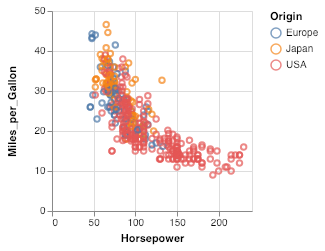

In [5]:
(oz/view! spec)

In [34]:
spec

{:data {:url "https://vega.github.io/vega-lite/data/cars.json"}, :mark "point",
 :encoding {:x {:field "Horsepower", :type "quantitative"},
            :y {:field "Miles_per_Gallon", :type "quantitative"},
            :color {:field "Origin", :type "nominal"}}}


In [69]:
(def data [{      :Miles_per_Gallon 18
      
      :Horsepower 130,
     
      :Origin "USA"
   },
   {

      :Miles_per_Gallon 15,
   
      :Horsepower 165,

      :Origin "Japa"
   }])

#unrepl/browsable [#'user/data /72]


In [70]:
data

[{:Miles_per_Gallon 18, :Horsepower 130, :Origin "USA"}
 {:Miles_per_Gallon 15, :Horsepower 165, :Origin "Japa"}]


In [ ]:
(def spec2
  {:data 
   {:values data}
   :mark "point"
   :encoding {
     :x {:field :Horsepower}
     :y {:field :Miles_per_Gallon}
     :color {:field :Origin}}})

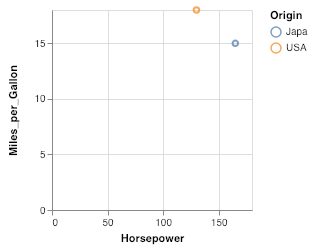

In [72]:
(oz/view! spec2)

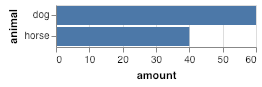

In [20]:
(oz/view! {:data {:values [{:animal :horse :amount 40}{:animal :dog :amount 60}]}
                          :mark :bar
                          :encoding {:x {:field :amount} 
                                     :y {:field :animal :type :ordinal}}})

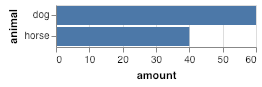

In [15]:
#unrepl/mime {:content-type "application/vnd.vegalite.v2+json"
              :content   {:data {:values [{:animal :horse :amount 40}{:animal :dog :amount 60}]}
                          :mark :bar
                          :encoding {:x {:field :amount} 
                                     :y {:field :animal :type :ordinal}}}}

In [ ]:
(jtime/instant)

In [84]:
(with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 2)
             sc/mappify
             doall
             pp/print-table))


| :day | :hour | :sched_dep_time | :tailnum | :arr_time | :sched_arr_time | :month | :dep_time | :carrier | :arr_delay | :year | :dep_delay | :origin | :flight | :distance | :air_time | :dest |           :time_hour | :minute |
|------+-------+-----------------+----------+-----------+-----------------+--------+-----------+----------+------------+-------+------------+---------+---------+-----------+-----------+-------+----------------------+---------|
|    1 |     5 |             515 |   N14228 |       830 |             819 |      1 |       517 |       UA |         11 |  2013 |          2 |     EWR |    1545 |      1400 |       227 |   IAH | 2013-01-01T10:00:00Z |      15 |


nil


In [6]:
(def flights (with-open [reader (io/reader "flights.csv")]
        (->> reader
             csv/read-csv
             (take 30)
             sc/mappify
             (sc/cast-with sc/->int {:only [:day :hour :sched_dep_time :arr_time :sched_arr_time :month :dep_time :arr_delay :year :dep_delay :flight :distance :air_time :minute] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with keyword  {:only [:tailnum :carrier :origin :dest] 
                                  :exception-handler (fn [colname value] nil)})
             (sc/cast-with {:time_hour jtime/java-date} {:exception-handler (fn [colname value] nil)})
             doall) ))

#unrepl/browsable [#'user/flights /5]


In [21]:
(slurp "permis")

Oops: 

In [7]:
(set! *print-length* 30)
(prn-str (slurp "./permissi.sh"))

"\"#!/bin/bash \\nset -e\\n\\nfor d in \\\"$@\\\"; do\\n  find \\\"$d\\\" \\\\\\n    ! \\\\( \\\\\\n  "/4


In [4]:
(+ 2 2)

4


In [17]:
(clojure.spec.alpha/conform ::hc/filters {(hc/every-of :day :month) [= 1]})

#unrepl/object [#unrepl/browsable [clojure.core$every_pred$ep1__8568 /40]
                "0x19a54fa2" "clojure.core/every-pred/ep1--8568" {:bean {/41}}]


In [14]:
(->> flights
     (hc/where {(hc/every-of :day :month) [= 1]}))

({:day 1, :hour 5, :sched_dep_time 515, :tailnum :N14228,
  :arr_time 830, :sched_arr_time 819, :month 1,
  :dep_time 517, :carrier :UA, :arr_delay 11, /32}
 {:day 1, :hour 5, :sched_dep_time 529, :tailnum :N24211,
  :arr_time 850, :sched_arr_time 830, :month 1,
  :dep_time 533, :carrier :UA, :arr_delay 20, /33}
 {:day 1, :hour 5, :sched_dep_time 540, :tailnum :N619AA,
  :arr_time 923, :sched_arr_time 850, :month 1,
  :dep_time 542, :carrier :AA, :arr_delay 33, /34}
 {:day 1, :hour 5, :sched_dep_time 545, :tailnum :N804JB,
  :arr_time 1004, :sched_arr_time 1022, /35}
 /36)


In [12]:
(hc/every-of :day)

{:huri.core/combinator
   #unrepl/object [#unrepl/browsable [clojure.core$every_pred /30]
                   "0x6d511037" "clojure.core/every-pred" {:bean {/31}}],
 :huri.core/keyfns (:day)}


In [ ]:
(clojure.spec.alpha/conform (clojure.spec.alpha/or :a string? :b integer?) 1
                            )

In [68]:
(clojure.set/select (comp odd? :x) #{{:x 1} {:x 2} {:x 3}})

#{{:x 1} {:x 3}}


In [77]:
(clojure.set/join [{:x 1}] 
                  [{:x 1 :y 3} {:x 1 :y 4} {:x 3 :y 5}])

#{{:x 1, :y 4} {:x 1, :y 3}}


In [ ]:
(->> flights 
     (take 5))

In [49]:
(defn run!-pipe [f! coll]
    "useful when you want to achieve some side effect in the middle of a
    threading macro."
    (f! coll)
    coll)

(->> [{:a 1}{:a 2}]
     (run!-pipe print-table)
     count)


| :a |
|----|
|  1 |
|  2 |


2




## afterword

I've created a pull request with the convenience functions that I've used https://github.com/sbelak/huri/pull/26

I specifically didn't want to use the words lazy and transducer on this page, because I believe including these terms in from the get go is a barrier to entry. I think people will naturally progress there as they get more comfortable with the language and the concepts. 

I could probably make the whole pipeline lazy instead of holding the dataset in memory. I'd be interested in seeing how I can do that without making the code more difficult. 

Partly I've written this post to give something back to the community, but also partly because I hope I get a discussion going that enables me to improve the way that I write code or that points me to usefull libraries that I'm not familiar with. I will try to update the article if I get useful feedback. I'm more than happy to receive pull requests. 

I'm not saying this is the way to do it, but it is 1 way that feels easy and has simple solutions for most problems. 

Currently I'm using the iclojure kernel. I miss having code completion and something like parinfer. I see that both of these things have 

## Datalog superpowers
I'm interested to see how far I'll come if I try to replace huri with datascript and do all of the wrangling in datalog. Futhermore, we can do graph db type stuff. I can imagine questions like is network of airports fully connected? What if you only have 1 day. And that day is 1 jan 2013. what are the 2 cities that you have to transfer the most to get there. Which cities cant you go there and back twice from newyork within x hours. Fastest paths. What are all the fastest paths. from where to where at what time must you travel the longest (so who is most fucked ?) etc.



## awknoledgments

- thanks to clojure core team for the language
- jupyter for the editor
- idl for vega-lite
- chris small for oz and semantic csv
- cgrand for iclojure
- simon belak for huri
- hadley wickham and .. for the code examples I've used from r4ds 
- to @JeroenVanDijk for reading a draft version
- to adgoji for allowing me to write this blog post .
- and surely I've forgotten some. Thank you as well. 
